# Principal Component Analysis

## I-Importer les bibliothèques et charger les données

Nous utilisons ici le jeu de données iris pour illustrer l'analyse PCA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Charger le jeu de données Iris
iris = load_iris()
X = iris.data  # Matrice des caractéristiques
variables = iris.feature_names  # Noms des variables

In [4]:

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Appliquer l'ACP
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

## II-Calcul des variances expliquées par chaque composante principale

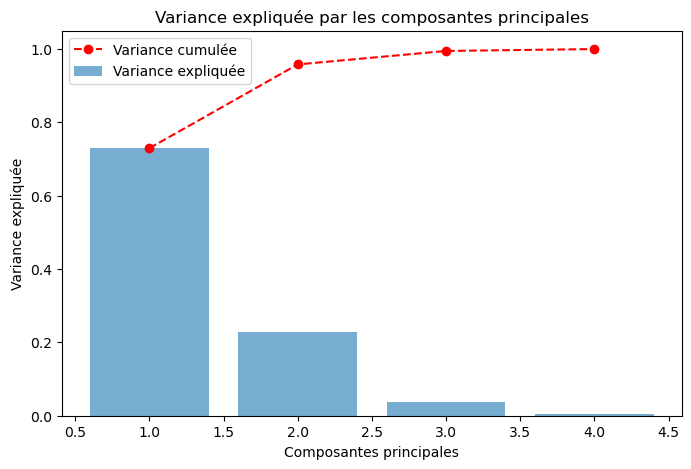

In [6]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Affichage
plt.figure(figsize=(8,5))
plt.bar(range(1, 5), explained_variance, alpha=0.6, label="Variance expliquée")
plt.plot(range(1, 5), cumulative_variance, marker='o', linestyle='--', color='red', label="Variance cumulée")
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée par les composantes principales")
plt.legend()
plt.show()

Cette courbe montre combien d’information est conservée en fonction du nombre de composantes.

In [7]:
print("Les pourcentages des variances expliquées par les composantes:", (explained_variance*100).round(2))
print("La variance cumulative expliquée est :", cumulative_variance.round(2))

Les pourcentages des variances expliquées par les composantes: [72.96 22.85  3.67  0.52]
La variance cumulative expliquée est : [0.73 0.96 0.99 1.  ]


### Conclusion:

<span style="color:blue"> **D'après les valeurs de la variance cumulative expliquée, on canstate qu'on peut concerver 96% de la variance globale dans un espace de deux dimensions** </span>.

## III-Calcul des qualités de représentation des variables

<span style="color:green"> **La qualité de représentation** d’une variable sur une composante (aussi appelée cos²) est calculée comme le carré des coefficients de la matrice des composantes divisés par la somme des coefficients au carré </span>.

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Matrice des composantes principales (charges factorielles)
loadings = pca.components_.T  # Transposée pour aligner avec les variables initiales

# Calcul des cos²

cos2 = (loadings ** 2) / np.sum(loadings ** 2, axis=1, keepdims=True)

# Affichage
cos2_df = pd.DataFrame(cos2, index=variables, columns=[f"PC{i+1}" for i in range(2)])
print("Qualité de représentation (cos²) des variables :\n", cos2_df)

Qualité de représentation (cos²) des variables :
                         PC1       PC2
sepal length (cm)  0.655894  0.344106
sepal width (cm)   0.078428  0.921572
petal length (cm)  0.998223  0.001777
petal width (cm)   0.986150  0.013850


Interprétation : Plus un cos² est proche de 1, mieux la variable est représentée sur cette composante.

## IV- Calcul des contributions des variables aux composantes principales

La contribution d’une variable à une composante est donnée par : `Contribution= (Charge factorielle²/∑Charge factorielle²)*100`

In [9]:
# Contributions des variables
contributions = (loadings ** 2) / np.sum(loadings ** 2, axis=0)

# Affichage sous forme de DataFrame
contrib_df = pd.DataFrame(contributions * 100, index=variables, columns=[f"PC{i+1}" for i in range(2)])
print("\nContributions des variables aux composantes principales :\n", contrib_df)


Contributions des variables aux composantes principales :
                          PC1        PC2
sepal length (cm)  27.150969  14.244406
sepal width (cm)    7.254804  85.247487
petal length (cm)  33.687936   0.059984
petal width (cm)   31.906291   0.448123


<span style="color:green"> **Interprétation** : Les variables ayant les plus grandes contributions sont celles qui influencent le plus chaque composante. </span>

## V-Visualisation des résultats
### Cercles des corrélations

- Les variables proches sont corrélées dans l'espace de projection.
- Si elles sont opposées, elles sont en relation inverse.
- Si elles sont **loin du centre**, elles sont **bien représentées**.

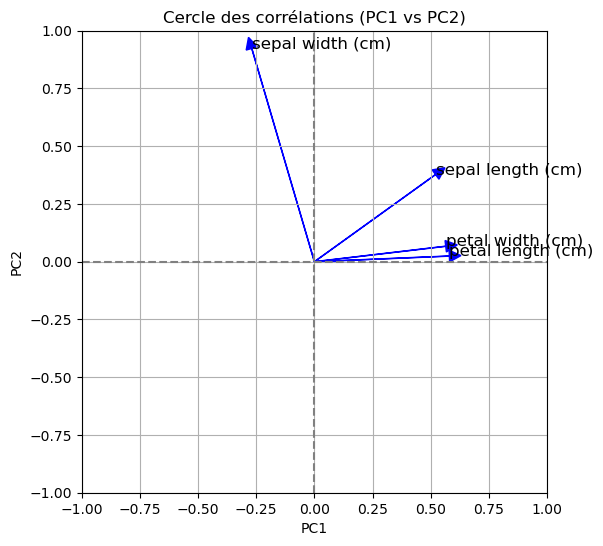

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(variables)):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, color='b')# trace une flèche partant de (0,0) jusqu'aux coordonnées de la variable
    plt.text(loadings[i, 0], loadings[i, 1], variables[i], fontsize=12)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des corrélations (PC1 vs PC2)")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()
plt.show()

### Projection des individus

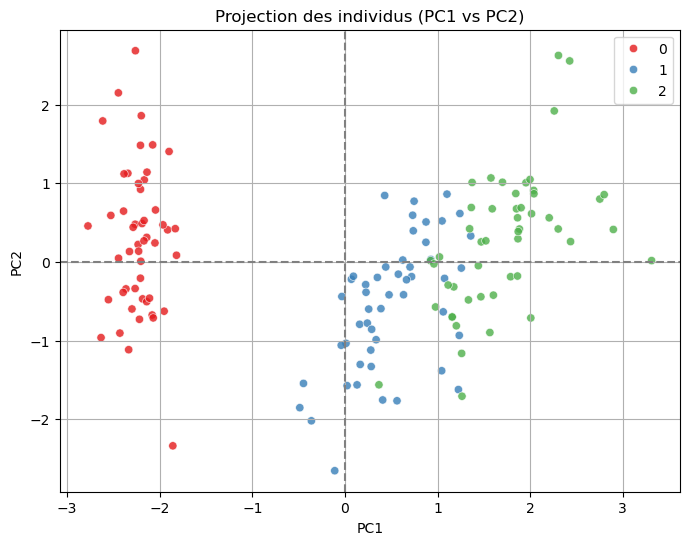

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=iris.target, palette="Set1", alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des individus (PC1 vs PC2)")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()
plt.show()

Interprétation :

- Les points proches appartiennent à des individus similaires.
- Une séparation des classes peut être visible si les premières composantes capturent bien la variabilité.

## VI- Conclusion

In [12]:
print("Les pourcentages des variances expliquées par les composantes:", (explained_variance*100).round(2))
print("La variance cumulative expliquée est :", cumulative_variance.round(2))

Les pourcentages des variances expliquées par les composantes: [72.96 22.85  3.67  0.52]
La variance cumulative expliquée est : [0.73 0.96 0.99 1.  ]


Si l'on conserve deux composantes principales après une Analyse en Composantes Principales (ACP), plusieurs observations peuvent être faites :

1- Conservation de la variance globale : Les deux premières composantes principales expliquent 96% de la variance totale, assurant ainsi une bonne représentation des données.

2- Composante 1 (PC1) – Axe principal des données : Elle capture 73% de l’information globale et est principalement formée par :

- Sepal length (27%)    
- Petal length (34%)    
- Petal width (33%) 

3- Composante 2 (PC2) – Variation complémentaire : Elle explique 23% de l’information globale et est essentiellement portée par :

- Sepal width (85%)

**Conclusion** : La première composante (PC1) traduit une forte corrélation entre les mesures des pétales, tandis que la seconde (PC2) met en avant la variation de la largeur des sépales comme un facteur distinctif. Ensemble, ces deux composantes offrent une représentation fidèle et compacte des données initiales.

## VII- Travail à faire: Analyse en Composantes Principales (ACP) et Clustering K-Means sur le jeu de données Décathlon

**Objectifs :**

- Appliquer une Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité et interpréter les principales sources de variation des performances des athlètes.

- Utiliser le clustering K-Means pour segmenter les athlètes en groupes homogènes en fonction de leurs performances.    

- Visualiser et interpréter les résultats pour comprendre les liens entre les disciplines et les profils d'athlètes.


**Contexte : Le jeu de données Décathlon**    
Le jeu de données Décathlon contient les performances de plusieurs athlètes sur 10 disciplines de l’épreuve du décathlon. Chaque colonne représente une discipline (course, lancer, saut, etc.), et chaque ligne correspond à un athlète.

**Variables disponibles :**

- Épreuves de course : 100m, 400m, 1500m, 110m haies
- Épreuves de saut : Longueur, Hauteur, Perche
- Épreuves de lancer : Poids, Disque, Javelot
- Score total   
💡 Les épreuves sont exprimées en différentes unités (secondes, mètres, points). Une standardisation est nécessaire avant l'ACP.

**Etapes à suivre**
1. Charger le jeu de données "decathlon.csv" et afficher un aperçu des données.
1. Vérifier et traiter les valeurs manquantes si nécessaire.
1. Standardiser les données (moyenne = 0, variance = 1) pour éviter les biais liés aux unités différentes.
1. Appliquer une ACP pour réduire la dimensionnalité des données.
1. Identifier les axes principaux et interpréter les regroupements d’épreuves dans l’espace factoriel.
1. Appliquer l’algorithme K-Means sur les premières composantes principales obtenues.
1. Déterminer le nombre optimal de clusters à l’aide de la méthode du coude.
1. Visualiser les clusters d’athlètes dans l’espace réduit de l’ACP.
1. Interpréter les groupes formés : Quels sont les profils types d’athlètes ? Quelles disciplines sont déterminantes pour la classification ?

In [14]:
df = pd.read_csv("decathlon.csv")
df.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [15]:
df.isnull().sum()

Athlets        0
100m           0
Long.jump      0
Shot.put       0
High.jump      0
400m           0
110m.hurdle    0
Discus         0
Pole.vault     0
Javeline       0
1500m          0
Rank           0
Points         0
Competition    0
dtype: int64